## **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('D:\KULIAH\SEMESTER 6\SAINS DATA PADA INDUSTRI\studyCase2-customerChurnModelling\Case 2 - Customer Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## **DATA INFORMATION**

In [3]:
#informasi data
print("INFORMASI data")
print(data.info())
print("--"*40)

print("DESKRIPSI data")
print(data.describe())
print("--"*40)

print("NULL CHECKING")
print(data.isna().sum())
print("--"*40)

print("DUPLICATE CHECK")
print(data.duplicated().sum())

INFORMASI data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

## **EDA&PRE-PROCESSING**

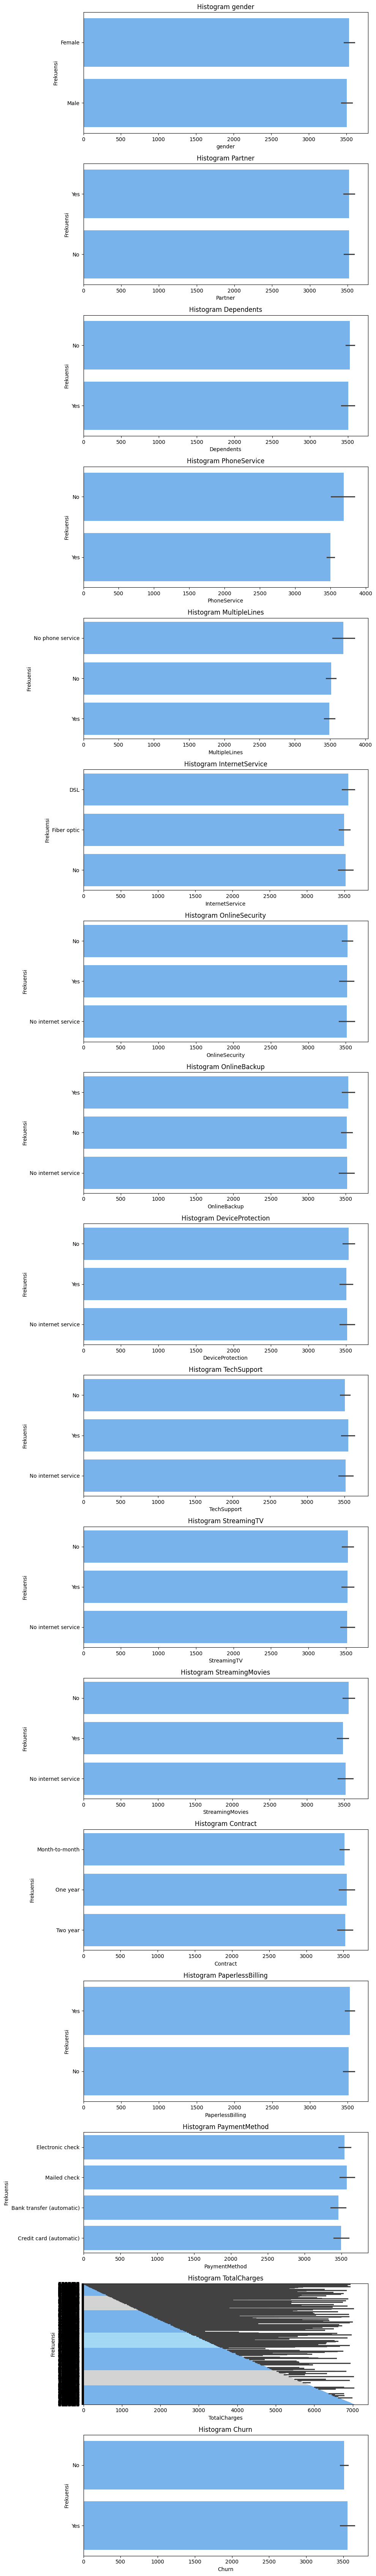

In [4]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

exclude_cols = ['customerID']

visualize_num_cols = [col for col in categorical_cols if col not in exclude_cols]

plt.figure(figsize=(10, 4 * len(visualize_num_cols)))
for i, col in enumerate(visualize_num_cols, 1):
    plt.subplot(len(visualize_num_cols), 1, i)
    sns.barplot(data[col], color='#66B3FF')
    plt.title(f'Histogram {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


In [5]:
data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [6]:
#Encode kolom
data['Partner'] = data['Partner'].replace({'Yes' : 1, 'No' : 0})
data['Dependents'] = data['Dependents'].replace({'Yes' : 1, 'No' : 0})
data['PhoneService'] = data['PhoneService'].replace({'Yes' : 1, 'No' : 0})
data['PaperlessBilling'] = data['PaperlessBilling'].replace({'Yes' : 1, 'No' : 0})
data['Churn'] = data['Churn'].replace({'Yes' : 1, 'No' : 0})

data['Contract'] = data['Contract'].replace({'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2})
data['StreamingMovies'] = data['StreamingMovies'].replace({'Yes' : 1, 'No' : 0, 'No internet service' : -1})
data['StreamingTV'] = data['StreamingTV'].replace({'Yes' : 1, 'No' : 0,'No internet service' : -1})
data['TechSupport'] = data['TechSupport'].replace({'Yes' : 1, 'No' : 0,'No internet service' : -1})
data['DeviceProtection'] = data['DeviceProtection'].replace({'Yes' : 1, 'No' : 0,'No internet service' : -1})
data['OnlineBackup'] = data['OnlineBackup'].replace({'Yes' : 1, 'No' : 0,'No internet service' : -1})
data['OnlineSecurity'] = data['OnlineSecurity'].replace({'Yes' : 1, 'No' : 0,'No internet service' : -1})
data['InternetService'] = data['InternetService'].replace({'No' : 0, 'DSL' : 1,'Fiber optic' : 2})
data['MultipleLines'] = data['MultipleLines'].replace({'Yes' : 1, 'No' : 0,'No phone service' : -1})

data['gender'] = data['gender'].replace({'Male' : 1, 'Female' : 0})
data['PaymentMethod'] = data['PaymentMethod'].replace({'Bank transfer (automatic)' : 0, 'Credit card (automatic)' : 1, 'Electronic check' : 2, 'Mailed check' : 3})


In [7]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,-1,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,-1,1,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,1,1,1,1,3,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,-1,1,1,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,3,74.40,306.6,1


In [8]:
#informasi data
print("INFORMASI data")
print(data.info())
print("--"*40)

print("DESKRIPSI data")
print(data.describe())
print("--"*40)

print("NULL CHECKING")
print(data.isna().sum())
print("--"*40)

print("DUPLICATE CHECK")
print(data.duplicated().sum())

INFORMASI data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-

In [9]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].isnull().sum()


11

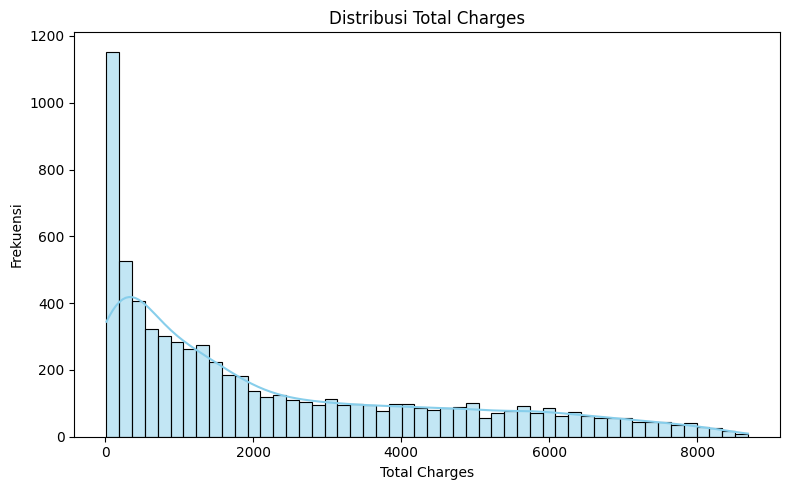

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='TotalCharges', bins=50, kde=True, color='skyblue')
plt.title('Distribusi Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


In [11]:
data.dropna(subset=['TotalCharges'], inplace=True)

In [12]:
data['TotalCharges'].isnull().sum()

0

In [13]:
#informasi data
print("INFORMASI data")
print(data.info())
print("--"*40)

print("DESKRIPSI data")
print(data.describe())
print("--"*40)

print("NULL CHECKING")
print(data.isna().sum())
print("--"*40)

print("DUPLICATE CHECK")
print(data.duplicated().sum())

INFORMASI data
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null 

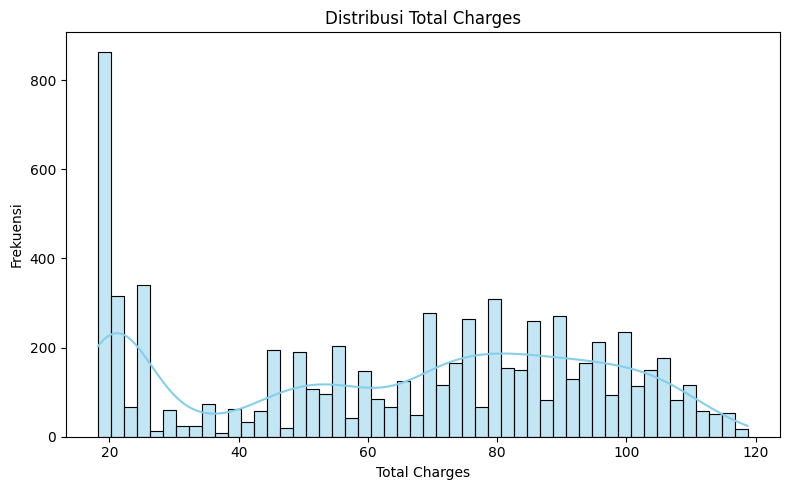

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='MonthlyCharges', bins=50, kde=True, color='skyblue')
plt.title('Distribusi Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


In [15]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,-1,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,-1,1,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,...,1,1,1,1,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,-1,1,1,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,3,74.40,306.60,1


C:\Users\GF 63\AppData\Local\Temp\ipykernel_19184\4230346617.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y='TotalCharges', palette='Set2')
C:\Users\GF 63\AppData\Local\Temp\ipykernel_19184\4230346617.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y='MonthlyCharges', palette='Set3')


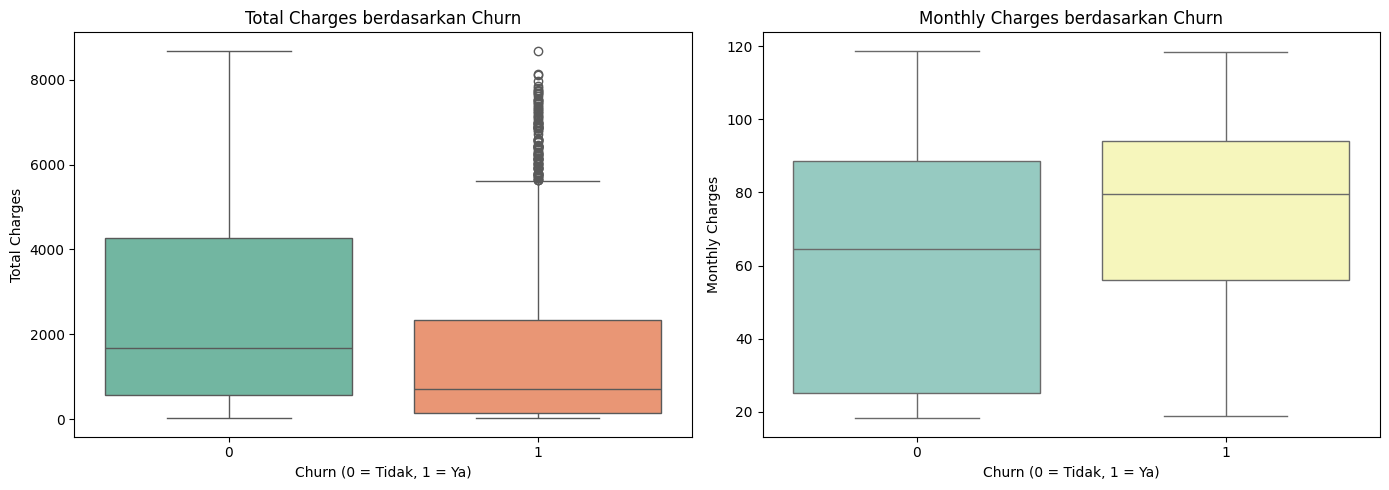

In [16]:
plt.figure(figsize=(14,5))

# Boxplot TotalCharges
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Churn', y='TotalCharges', palette='Set2')
plt.title('Total Charges berdasarkan Churn')
plt.xlabel('Churn (0 = Tidak, 1 = Ya)')
plt.ylabel('Total Charges')

# Boxplot MonthlyCharges
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Churn', y='MonthlyCharges', palette='Set3')
plt.title('Monthly Charges berdasarkan Churn')
plt.xlabel('Churn (0 = Tidak, 1 = Ya)')
plt.ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

C:\Users\GF 63\AppData\Local\Temp\ipykernel_19184\650651499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data['TotalCharges'], palette='Set2')
C:\Users\GF 63\AppData\Local\Temp\ipykernel_19184\650651499.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data['MonthlyCharges'], palette='Set2')


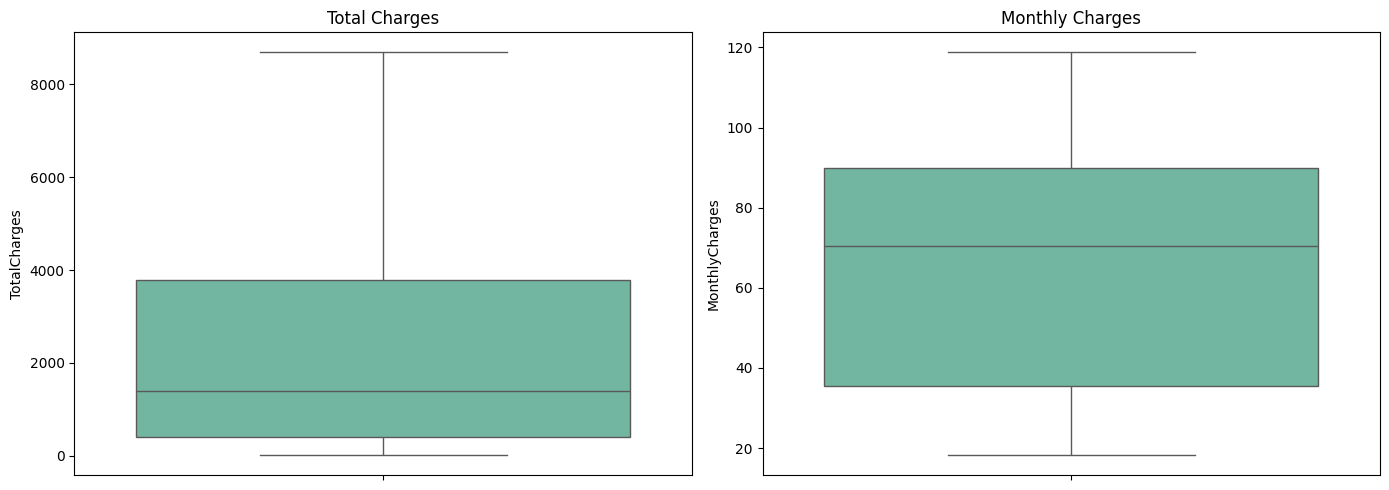

In [17]:
plt.figure(figsize=(14,5))

# Boxplot TotalCharges
plt.subplot(1, 2, 1)
sns.boxplot(data['TotalCharges'], palette='Set2')
plt.title('Total Charges')

# Boxplot MonthlyCharges
plt.subplot(1, 2, 2)
sns.boxplot(data['MonthlyCharges'], palette='Set2')
plt.title('Monthly Charges')

plt.tight_layout()
plt.show()

In [18]:
# Pisahkan fitur dan target
X = data.drop(columns=['Churn','customerID'], axis=1)
y = data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
# Buat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.7022032693674485

Confusion Matrix:
 [[812 221]
 [198 176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1033
           1       0.44      0.47      0.46       374

    accuracy                           0.70      1407
   macro avg       0.62      0.63      0.63      1407
weighted avg       0.71      0.70      0.70      1407



In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Definisi model dasar
dt = DecisionTreeClassifier(random_state=42)

# Grid hyperparameter
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search dengan cross-validation 5-fold
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Latih model
grid_search.fit(X_train, y_train)

# Ambil model terbaik
best_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred = best_model.predict(X_test)

# Evaluasi
print("Best Parameters:", grid_search.best_params_)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi: 0.7782515991471215

Confusion Matrix:
 [[964  69]
 [243 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      1033
           1       0.66      0.35      0.46       374

    accuracy                           0.78      1407
   macro avg       0.73      0.64      0.66      1407
weighted avg       0.76      0.78      0.75      1407

